In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

In [7]:
file_path = r'C:\Users\Justa\Desktop\GoIT\Python\facebook_ads_data.csv'
df = pd.read_csv(file_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [10]:
df[:5]

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [19]:
df_2021 = df[(df['ad_date'] >= '2021-01-01') & (df['ad_date'] <= '2021-12-31')]
df_grouped = df_2021.groupby(by='ad_date').sum()
print(df_grouped)

                       campaign_name  total_spend  total_impressions  \
ad_date                                                                
2021-01-01            BrandDiscounts         0.39                353   
2021-01-02                 Discounts         7.74              10709   
2021-01-04                 Discounts        70.06              22440   
2021-01-05                 Discounts        81.15              60232   
2021-01-06            BrandDiscounts       142.77              65265   
...                              ...          ...                ...   
2021-12-27  LookalikeTrendyWholesale       478.31             103725   
2021-12-28  LookalikeTrendyWholesale       359.83             101788   
2021-12-29  LookalikeTrendyWholesale       163.25              32290   
2021-12-30  LookalikeTrendyWholesale       285.67              64171   
2021-12-31  LookalikeTrendyWholesale       173.38              56749   

            total_clicks  total_value   cpc    cpm       ctr   

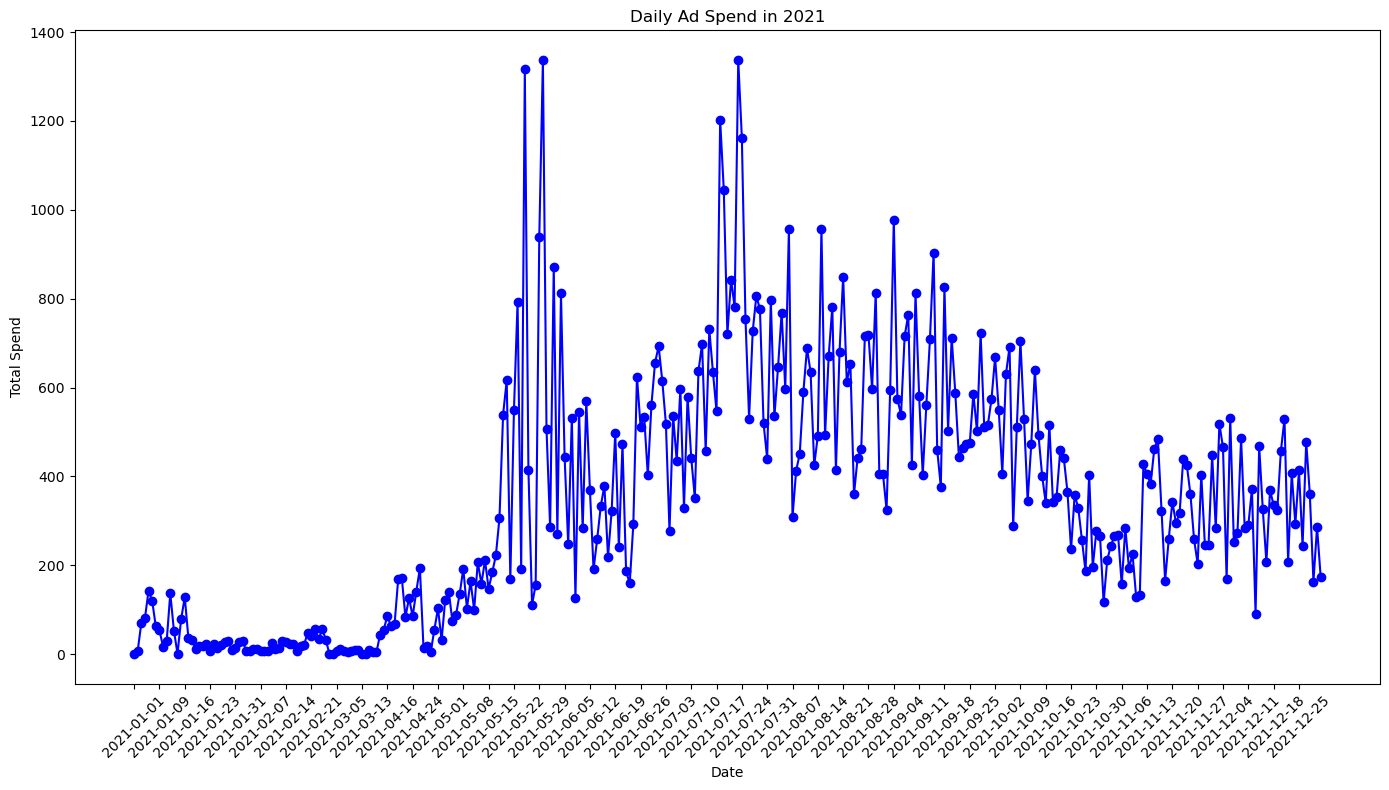

In [26]:
plt.figure(figsize=(14, 8))
plt.plot(df_grouped.index, df_grouped['total_spend'], marker='o', linestyle='-', color='blue' )
plt.title('Daily Ad Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend')
##plt.grid(True)
x_ticks = df_grouped.index[::7]
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=45)
plt.tight_layout()
plt.show()

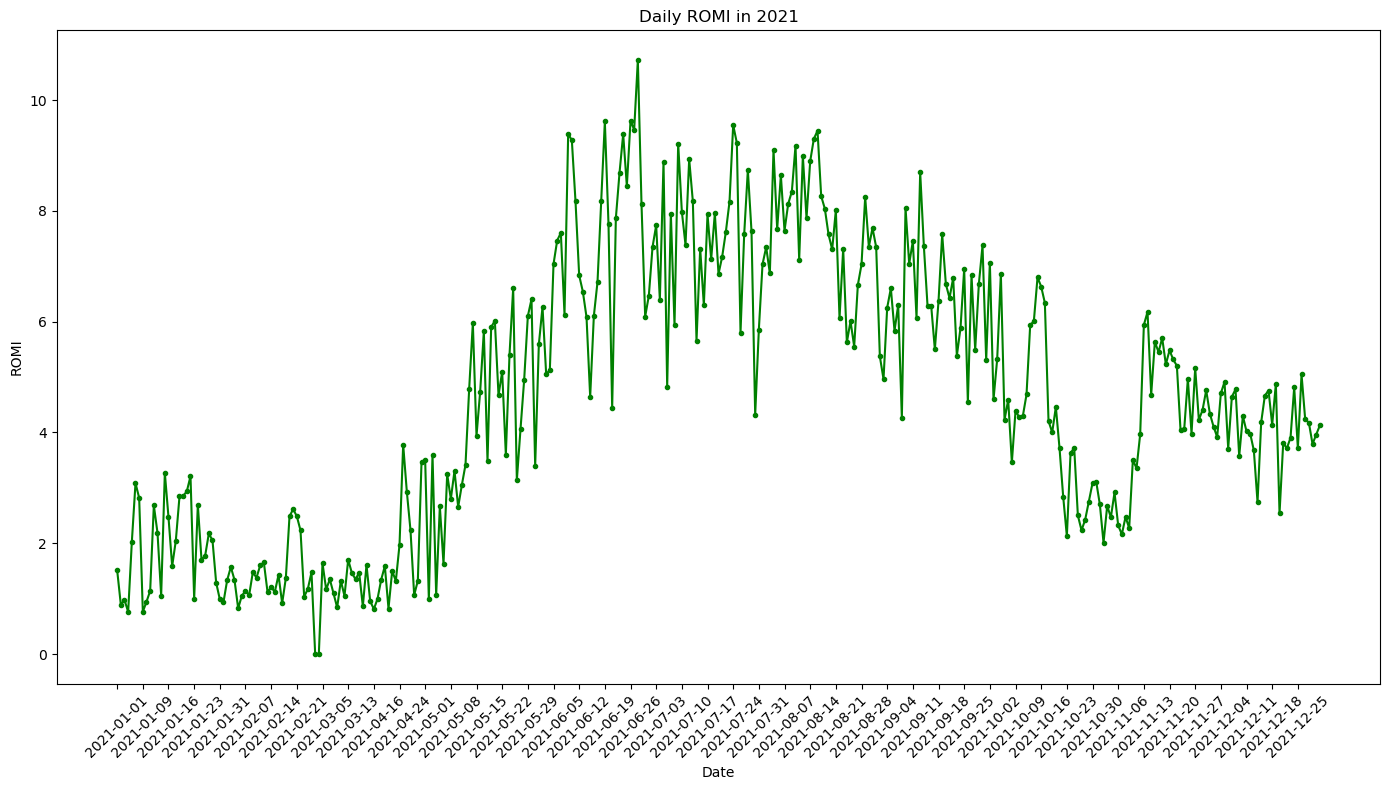

In [28]:
plt.figure(figsize=(14, 8))
plt.plot(df_grouped.index, df_grouped['romi'], marker='.', linestyle='-',  color='green')
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
##plt.grid(True)
x_ticks = df_grouped.index[::7]
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=45)
plt.tight_layout()
plt.show()

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

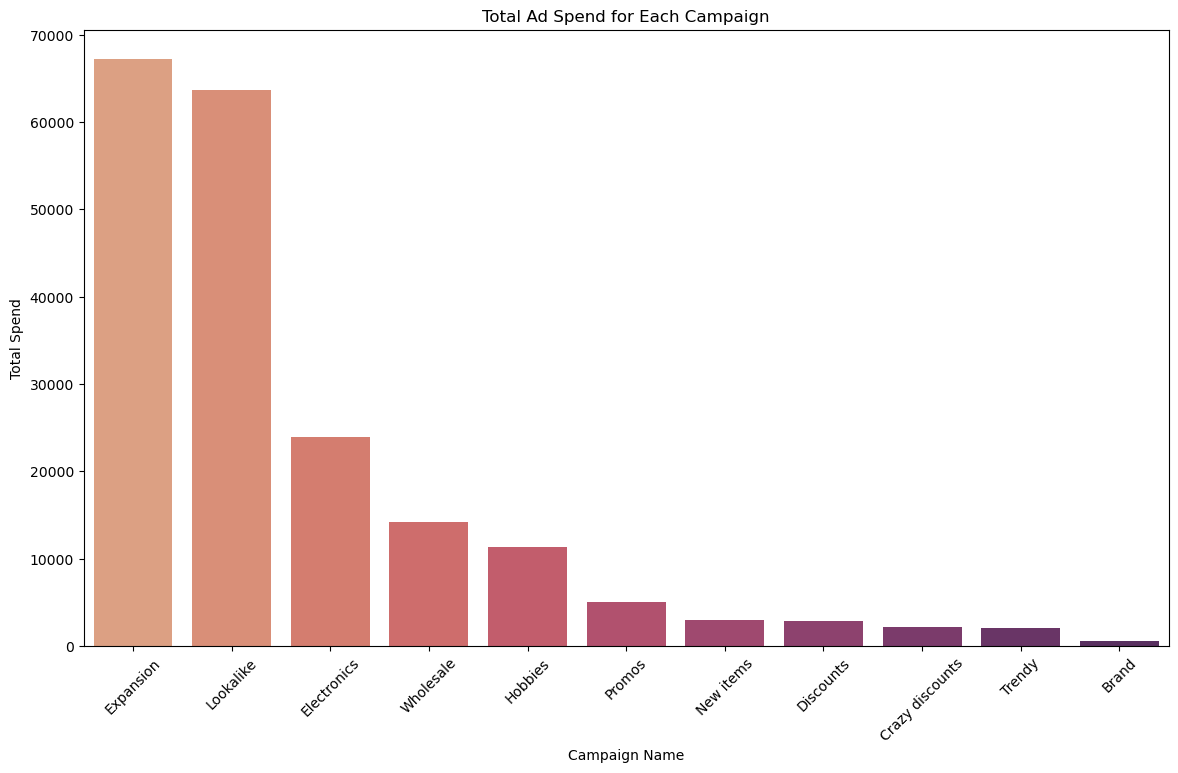

In [57]:
df_total_spend_campaign = df.groupby(by='campaign_name')['total_spend'].sum().reset_index()
df_campaign = df_total_spend_campaign.sort_values(by='total_spend', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='campaign_name', y='total_spend', data=df_campaign, order=df_campaign['campaign_name'], palette='flare')
plt.title('Total Ad Spend for Each Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

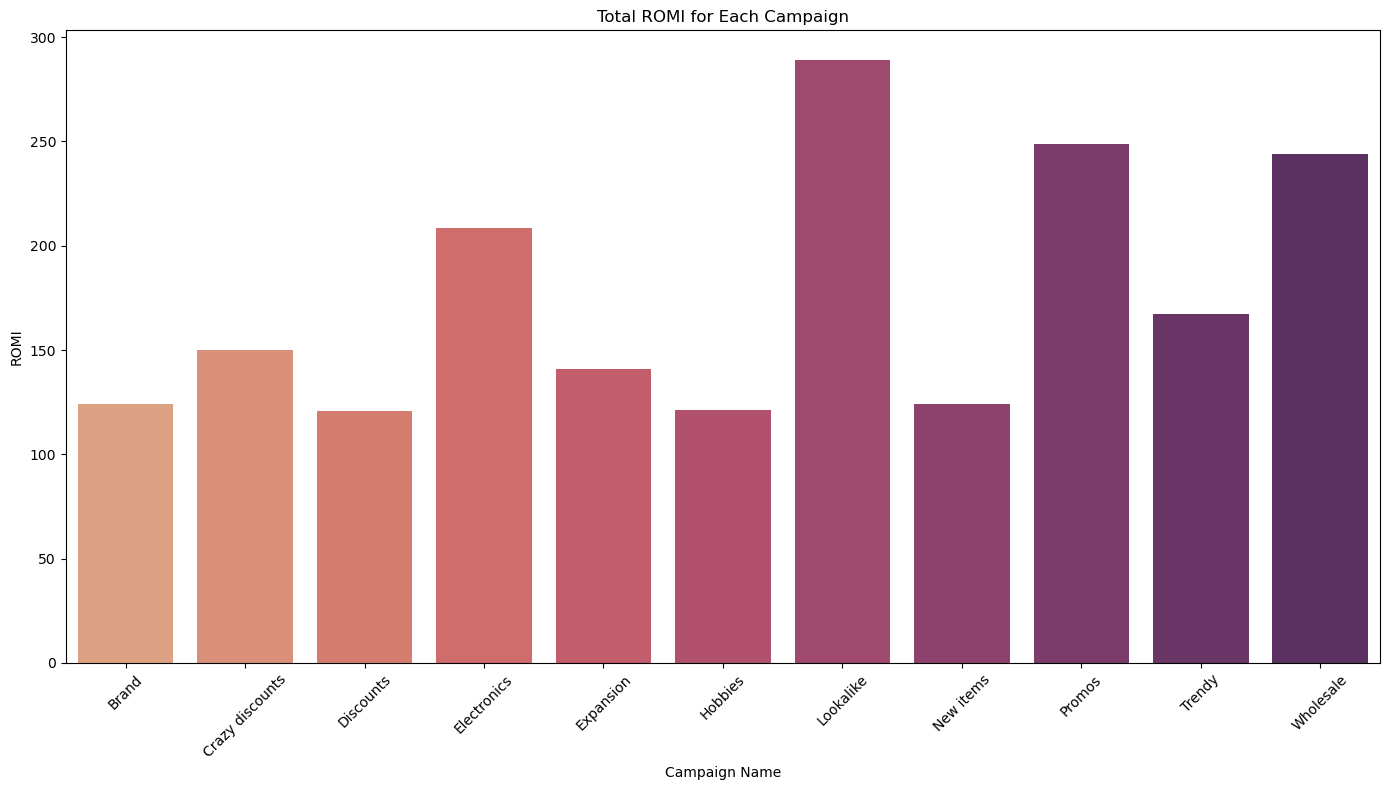

In [58]:
df_campaign_romi = df.groupby(by='campaign_name')['romi'].sum().reset_index()
df_campaign = df_campaign_romi.sort_values(by='romi', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='campaign_name', y='romi', data=df_campaign_romi, order=df_campaign_romi['campaign_name'], palette='flare')
plt.title('Total ROMI for Each Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

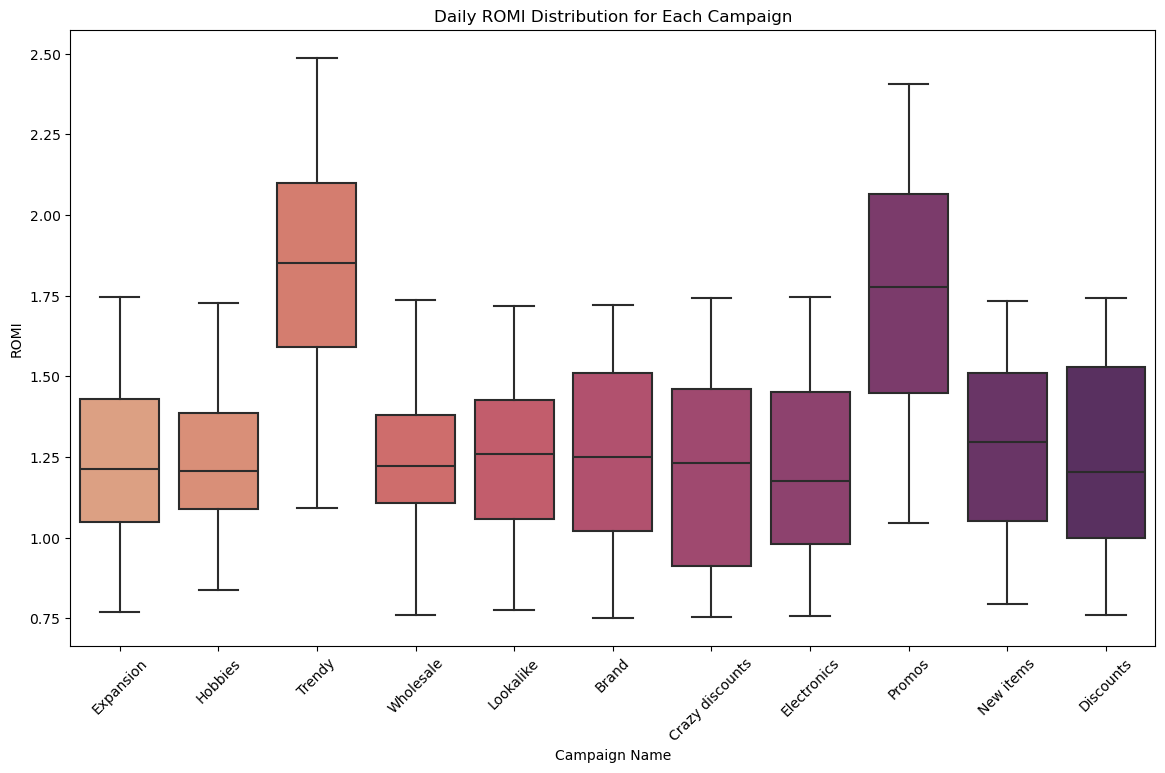

In [51]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='campaign_name', y='romi', data=df, palette='flare')
plt.title('Daily ROMI Distribution for Each Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

C:\Users\Justa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


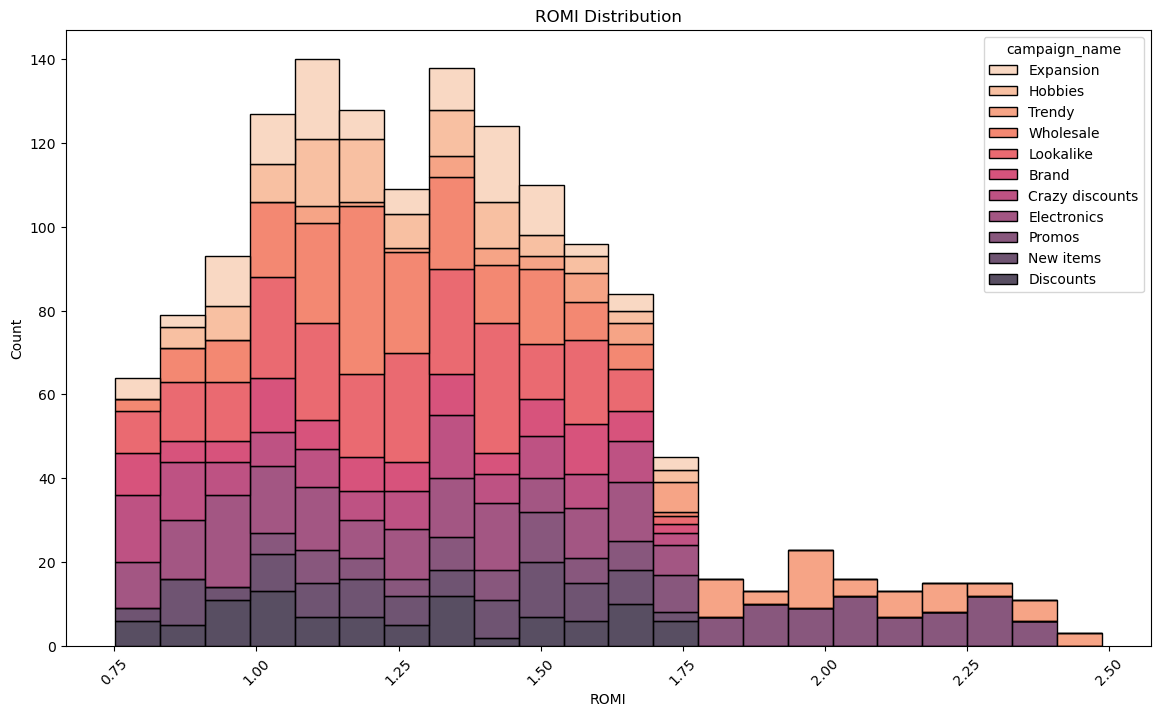

In [50]:
plt.figure(figsize=(14, 8))
sns.histplot(x='romi', hue='campaign_name',palette='rocket_r', multiple='stack', legend=True, data=df)
plt.title('ROMI Distribution')
plt.xlabel('ROMI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

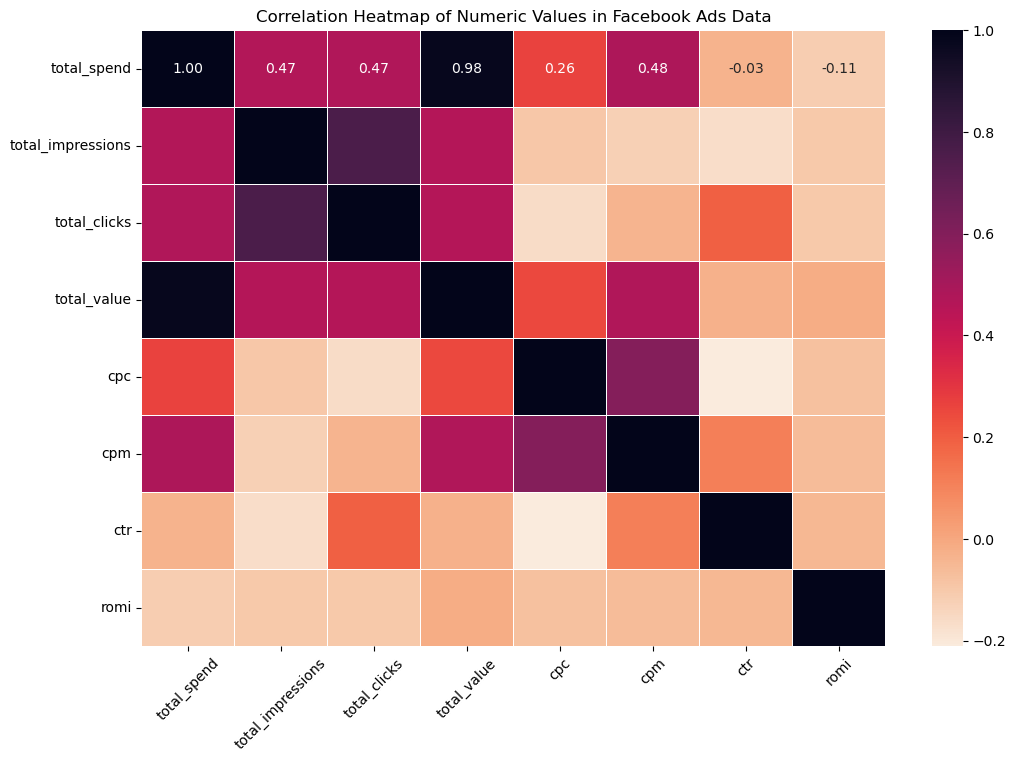

Highest correlations (excluding self-correlations and repeating pairs):
total_spend        total_value     0.978615
total_impressions  total_clicks    0.761440
cpc                cpm             0.593732
dtype: float64

Lowest correlations (excluding self-correlations and repeating pairs):
cpc                ctr   -0.210719
total_impressions  ctr   -0.166178
total_clicks       cpc   -0.159521
dtype: float64

Correlation of 'total_value' with other columns:
total_spend          0.978615
total_impressions    0.463626
total_clicks         0.464695
total_value          1.000000
cpc                  0.250851
cpm                  0.471471
ctr                 -0.029720
romi                -0.012599
Name: total_value, dtype: float64


In [37]:
numeric_columns = ['total_spend', 'total_impressions', 'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi']
df_numeric = df[numeric_columns]
df_numeric = df_numeric.dropna()
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='rocket_r', vmin=-0.210719, vmax=1, linewidth=.5)
plt.title('Correlation Heatmap of Numeric Values in Facebook Ads Data')
plt.xticks(rotation=45)
plt.show()

upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
stacked_correlations = upper_triangle_matrix.stack()
sorted_correlations = stacked_correlations.sort_values(kind="quicksort")

print("Highest correlations (excluding self-correlations and repeating pairs):")
print(sorted_correlations[-3:][::-1])   # Display top 10 highest correlations excluding self-correlations and repeating pairs
print("\nLowest correlations (excluding self-correlations and repeating pairs):")
print(sorted_correlations[:3])  # Display top 10 lowest correlations

print("\nCorrelation of 'total_value' with other columns:")
print(correlation_matrix['total_value'])

<Figure size 1200x800 with 0 Axes>

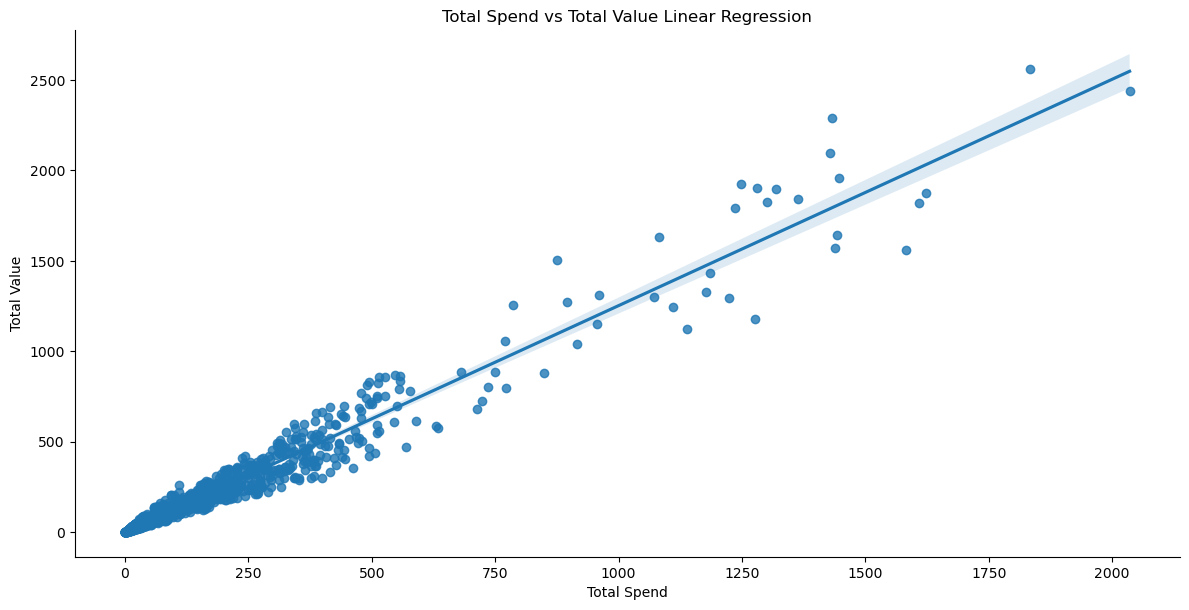

In [47]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='total_spend', y='total_value',data=df, aspect=2, height=6)
plt.title('Total Spend vs Total Value Linear Regression')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()

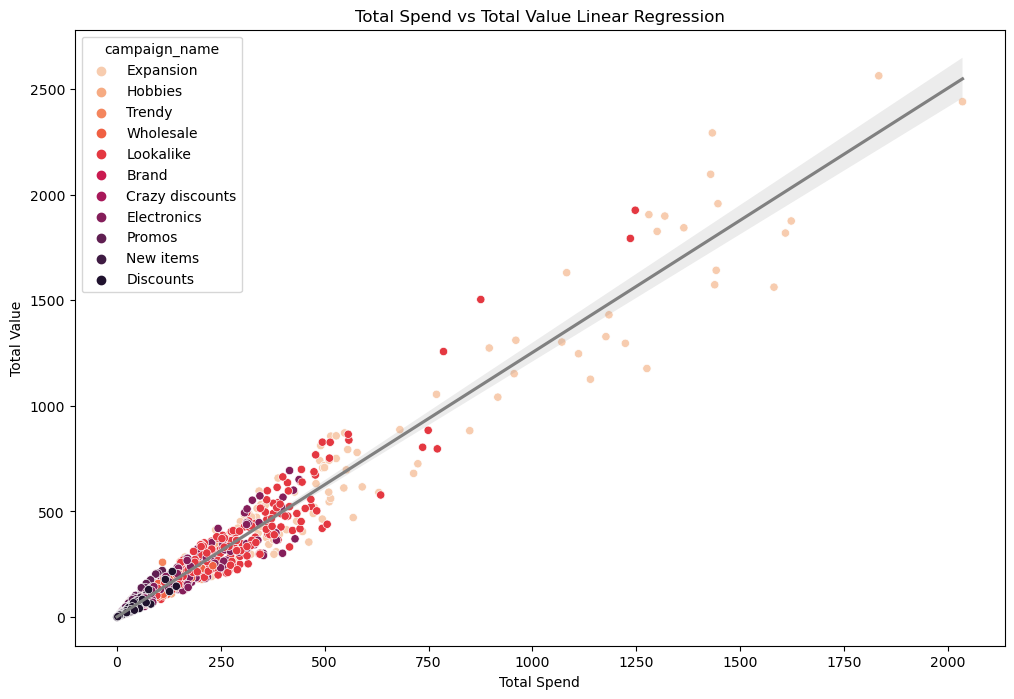

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_spend', y='total_value', hue='campaign_name', data=df, palette='rocket_r')
sns.regplot(x='total_spend', y='total_value', data=df, scatter=False, color='gray')
plt.title('Total Spend vs Total Value Linear Regression')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()